In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stat

## Simulating Fair RW
The discrete fair random walk is the stochastic process defined as follows: 
1. $X_0 = 0$
2. $P(X_n = X_{n-1} + 1 | X_n) = 0.5$, $P(X_n = X_{n-1} - 1 | X_n) = 0.5$


In [2]:
length = 1
fair_rw_flips = 2* np.random.choice(2, length, p = [0.5, 0.5]) - 1
print(int(fair_rw_flips))
fair_rw = np.cumsum(fair_rw_flips)
print(np.concatenate([np.array([0]), fair_rw]))

1
[0 1]


## Simulating Persistent Random Walk
- $X_0^p=0, P\left(X_1^p=-1\right)=\frac{1}{2}, P\left(X_1^p=1\right)=\frac{1}{2}$.
- $\forall n \geqslant 1, \varepsilon_n^p:=X_n^p-X_{n-1}^p$ equals 1 or $-1$ a.s.
- $\forall n \geqslant 1, P\left(\varepsilon_{n+1}^p=\varepsilon_n^p \mid \sigma\left(X_k^p, 0 \leqslant k \leqslant n\right)\right)=p$.

The proposal density being the fair random walk, want to do accept-reject (von neumann rejection sampling) to simulate the persistent random walk. 


Initial Proposal Flip:  [-1]
Efficiency of Acceptance-Rejection: 0.5797101449275363
[  0  -1  -2 ... -34 -35 -36]


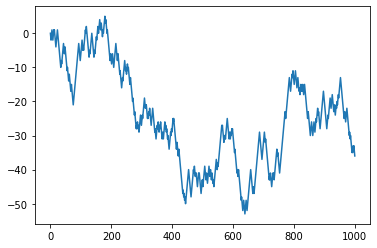

In [3]:
p = 0.7
def persistent_rw_flips(p, length = 1000):
  c = 1/(2 * min(p , 1 - p))
  X = np.array([0])
  proposal_flip = 2*np.random.choice(2, 1, p = [0.5, 0.5]) - 1
  print("Initial Proposal Flip: ", proposal_flip)
  X = np.concatenate([X, proposal_flip]) # X_0, X_1
  past_flip = proposal_flip
  count = 1
  while len(X) <= length:
  # for i in range(2, 100):
    proposal_flip = 2*np.random.choice(2, 1, p = [0.5, 0.5]) - 1
    u = np.random.uniform(low = 0, high = c)
    if u < 2 * (p if proposal_flip == past_flip else 1- p):  # IF U < f(x)/g(x) then accept else reject
      X = np.concatenate([X, proposal_flip])
      past_flip = proposal_flip
    count += 1
  print("Efficiency of Acceptance-Rejection:", length/count)
  return X

flips = persistent_rw_flips(p, length= 1000)
persistent_rw = np.cumsum(flips)
plt.plot(persistent_rw)
print(persistent_rw)

Initial Proposal Flip:  [-1]
Efficiency of Acceptance-Rejection: 0.6090133982947625
Initial Proposal Flip:  [-1]
Efficiency of Acceptance-Rejection: 0.5931198102016607
Initial Proposal Flip:  [1]
Efficiency of Acceptance-Rejection: 0.5959475566150179
Initial Proposal Flip:  [-1]
Efficiency of Acceptance-Rejection: 0.5966587112171837
Initial Proposal Flip:  [1]
Efficiency of Acceptance-Rejection: 0.6402048655569782


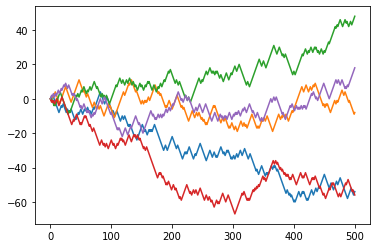

In [4]:
sample_paths = 5
for i in range(sample_paths):
  persistent_rw = np.cumsum(persistent_rw_flips(p, 500))
  plt.plot(persistent_rw)

## Distribution of $\mu(p)$ is $\operatorname{U}(\frac{1}{2}, 1)$


Initial Proposal Flip:  [1]
Efficiency of Acceptance-Rejection: 0.08480499431692877
Initial Proposal Flip:  [-1]
Efficiency of Acceptance-Rejection: 0.2935925295119516
Initial Proposal Flip:  [-1]
Efficiency of Acceptance-Rejection: 0.3429845626072041
Initial Proposal Flip:  [1]
Efficiency of Acceptance-Rejection: 0.16592538502389803
Initial Proposal Flip:  [-1]
Efficiency of Acceptance-Rejection: 0.8782501756851722
Initial Proposal Flip:  [-1]
Efficiency of Acceptance-Rejection: 0.7739588171543582
Initial Proposal Flip:  [1]
Efficiency of Acceptance-Rejection: 0.920795726653159
Initial Proposal Flip:  [-1]
Efficiency of Acceptance-Rejection: 0.044433185785646985
Initial Proposal Flip:  [1]
Efficiency of Acceptance-Rejection: 0.004910194227206739
Initial Proposal Flip:  [1]
Efficiency of Acceptance-Rejection: 0.976557921469037
Initial Proposal Flip:  [-1]
Efficiency of Acceptance-Rejection: 0.6427102082797634
Initial Proposal Flip:  [-1]
Efficiency of Acceptance-Rejection: 0.2911982291

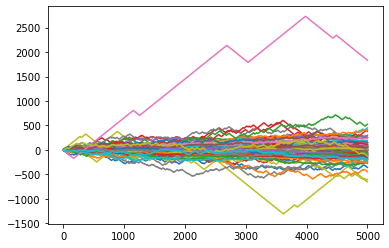

In [5]:
# H = 0.8
num_samples = 100
process_length = 5000
p = np.random.uniform(low = 1/2, high = 1, size = num_samples)
persistent_rw = np.zeros((num_samples, process_length))
for i in range(num_samples):
  # print(i)
  persistent_rw[i] = np.cumsum(persistent_rw_flips(p[i], process_length - 1))
  plt.plot(persistent_rw[i])

[ 0.         -0.11313708 -0.11313708 ... 13.29360749 13.15218613
 13.01076477]


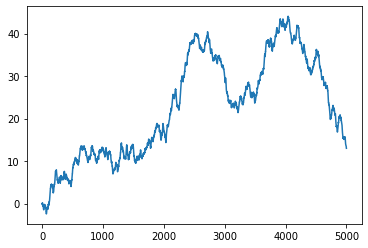

In [6]:
lrd_process = np.sum(persistent_rw, axis = 0)/np.sqrt(process_length)
print(lrd_process)
plt.plot(lrd_process)

## Trotter Product Idea 
Small pieces are wrong - but over a larger scale (i.e., in the limit), the path converges to an FBM. 
This only works for continuous time simulations. 

In [7]:
def truncated_beta(low = 0, high = 1, a = 1, b = 1, size = 1): # Accept-Reject method to simulate truncated beta
  sample = []
  while len(sample) < size:
    proposed_sample = stat.beta.rvs(a, b, loc = 0, scale = 1, size = 1, random_state = None)
    if proposed_sample <= high and proposed_sample >= low: 
      sample.append(proposed_sample)
    else:
      continue
  if size == 1:
    return sample[0]
  return sample

## The story about $\mu(p)$
The distribution $\mu(p)$ defined in [1], on the persistence parameter of the $p$-persistent random walk is the "Truncated Beta Distribution" with $a = 1, b = 2 - 2H$ with the truncation interval being  $[0.5, 1]$. The density of this Truncated Beta distribution is the following: 
$$f_{\mu}(p) = (1 - H) 2^{3 - 2H} (1 - p)^{1 - 2H}, \, p \in \left(\frac{1}{2}, 1\right)$$
<b> The code to simulate FBM using the trotter-product type idea is contained in the cell below. </b>
### References 
1. https://arxiv.org/abs/math/0210272

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


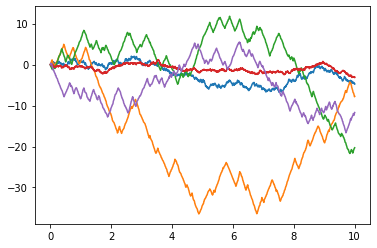

In [12]:
import os
# H = 0.8
# H = 0.95
H = 0.5
# H = 0.85
for i in range(5):
  os.system('cls')
  print("Iteration:", i)
  N = 20 # Time Scaling
  time_limit = 10
  jump_times = [0]
  X = np.array([0])
  while jump_times[-1] < time_limit:
    wait_time = np.random.exponential(scale = 1/N**2)
    jump_times.append(jump_times[-1] + wait_time)
    if len(X) == 1:
      proposal_flip = (2*np.random.choice(2, 1, p = [0.5, 0.5]) - 1)/N

      X = np.concatenate([X, proposal_flip]) # X_0, X_1
      past_flip = proposal_flip
      count = 2
      # p = np.random.uniform(low = 1/2, high = 1)
      # sample p from the truncated beta distribution 
      mu_p =  truncated_beta(low = 0.5, high = 1, a = 1, b = 2 - 2*H)
      c = 1/(2 * min(mu_p , 1 - mu_p))
      continue
    # print("At jump time:", jump_times[-1])
    while True:
      proposal_flip = (2*np.random.choice(2, size = 1, p = [0.5, 0.5]) - 1)/N
      # print("Proposal Flip", proposal_flip)
      u = np.random.uniform(low = 0, high = c)
      count += 1
      if u < 2 * (mu_p if proposal_flip == past_flip else 1 - mu_p):  # IF U < f(x)/g(x) then accept else reject

        X = np.concatenate([X, proposal_flip])
        past_flip = proposal_flip
        break
      else:
        continue
    past_flip = proposal_flip
    count = 1

  sample_path = np.cumsum(X)
  # print(sample_path.shape)
  plt.plot(jump_times, sample_path)




In [9]:
3# from scipy.stats import truncexpon as texp
# neg_exponential = -1 * texp.rvs(1/2, loc=-1, scale=1, size=100000, random_state=None)
# print(neg_exponential)
# plt.hist(neg_exponential, density = True)
# # exponential = -scipy.stats.truncexpon.rvs(1/2, loc=-1, scale=1, size=10000, random_state=None)
# # plt.hist(exponential, density = True)


3

## **Commented Block**
## Simulate FBM Gaussian 


There are essentially two steps to simulate a fractional brownian motion: 
1. Simulate a correlated centred gaussian process with the autocorrelation function as follows: 
$$r(s | H) = (2 - 2H) \operatorname{Beta}(s + 1, 2 - H) $$
Where $H$ is the hurst parameter, and $\operatorname{Beta}$ is defined traditionally as the Beta function derived using the Gamma Integral (or function). 

2. Subordinate the Gaussian process in the following fashion: Let $\{G_t\}_{t \in \mathbb{N}}$ be the Gaussian process, then the subordinated process is 

---

defined to be $\{\frac{G_{[Nt]}}{N^H}\}_{t \in \mathbb{N}}$, for $ N \to \infty$



---
### Simulated Correlated Gaussian


---



## Simulating Anti-Persistent Random Walk
1. $\tilde{X}_0^p=0, P\left(\tilde{X}_1^p=-1\right)=1 / 2, P\left(\tilde{X}_1^p=1\right)=1 / 2$.
2. $\forall n \geqslant 1, \tilde{\varepsilon}_n^p:=\tilde{X}_n^p-\tilde{X}_{n-1}^p$ equals 1 or $-1$ a.s.
3. $\forall n \geqslant 1, P\left(\tilde{\varepsilon}_{2 n}^p=\tilde{\varepsilon}_{2 n-1}^p \mid \sigma\left(\tilde{X}_k^p, 0 \leqslant k \leqslant 2 n-1\right)\right)=p$.
4. $\forall n \geqslant 1, \tilde{\varepsilon}_{2 n+1}^p=-\tilde{\varepsilon}_{2 n}^p$.
